# **Lecture 5- Part 2: Unsupervised Learning**
(Lecture Credit - Cornell Tech - https://kuleshov-group.github.io/aml-book/intro.html)

Next, we shift our attention towards the second major class of machine learning algorithms: unsupervised learning.

# 8.1. Introduction to Unsupervised Learning

<!-- As mentioned before, the three main types of machine learning methods are supervised learning, unsupervised learning, and Reinforcement learning. We were focusing on supervised learning for the last few lectures, but now we will shift our attention to another primary learning paradigm, unsupervised learning. -->

<!-- Let's start by understanding what is unsupervised learning at a high level, starting with a dataset and an algorithm. -->

In unsupervised learning, we start with a dataset *that does not contain* labels.  Unsupervised learning seeks to discover interesting and useful patterns in this data, such as:
* __Clusters of related datapoints__. For example, we might want to discover groups of similar customers from the logs of an e-commerce website.
* __Outliers__, i.e., particularly unusual or interesting datapoints. For example, suspicious financial transactions.
* __Denoised signals__. Recovering an image corrupted with white noise.

## 8.1.1. Unsupervised Learning: An Example

To make things concrete, let's look at an example of an unsupervised learning.

We can describe unsupervised learning via the following recipe, which is similar to the one we introduced in the context of supervised learning.

$$ 
\text{Dataset} + \text{Learning Algorithm} \to \text{Unsupervised Model} 
$$

The unsupervised model is no longer a predictive model. Rather, it describes interesting structure in the data. For instance, it can identify clusters of related datapoints.

### 8.1.1.1. An Unsupervised Learning Dataset

As an example of an unsupervised learning dataset, we will use the Iris flower data that we have previously seen in the context of supervised learning. To make things truly unsupervised, we will discard all the labels from this dataset.

Let's start by loading this dataset.

In [12]:
# import standard machine learning libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings

# Suppressing warning messages
warnings.filterwarnings("ignore")

# Load the Iris dataset
iris = datasets.load_iris()

# Print out the description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

For simplicity, we will discard petal length and width and use only sepal length and width as the attributes of each datapoint. Importantly, we also discard the class label.

With each datapoint containing two attributes, we can visualize this dataset in 2D using the code below.

In [16]:
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
from bokeh.plotting import figure, output_notebook, show

# Output to notebook
output_notebook()

# Create a new plot
p = figure(title="Dataset of Iris flowers", x_axis_label="Sepal length (cm)", y_axis_label="Sepal width (cm)")

# Add circle glyphs
p.circle(iris.data[:,0], iris.data[:,1], size=8, alpha=0.5)

# Show the plot
show(p)

Loading BokehJS ...

### 8.1.1.2. An Unsupervised Learning Algorithm

We will use the above dataset as input to an important and popular unsupervised learning algorithm, $K$-means.

* The algorithm seeks to find $K$ clusters in the data.

* Each cluster is characterized by its centroid (its mean).

The code below runs $K$-means, which is available in the `sklearn` libary, using $K = 3$.

In [18]:
# fit K-Means with K=3
from sklearn import cluster
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data[:,[0,1]])

KMeans(n_clusters=3)

The output of $K$-means are three cluster centroids: these are just three points in the space of $x$. Let's visualize them together with our dataset.

In [20]:
# Output to notebook
output_notebook()

# Create a new plot
p = figure(title="Dataset of Iris flowers", x_axis_label="Sepal length (cm)", y_axis_label="Sepal width (cm)")

# Add circle glyphs for datapoints
p.circle(iris.data[:,0], iris.data[:,1], size=8, alpha=0.5, legend_label='Datapoints')

# Add diamond glyphs for cluster centers
p.diamond(model.cluster_centers_[:,0], model.cluster_centers_[:,1], size=12, color='red', legend_label='Probability peaks')

# Add legend
p.legend.location = "top_left"

# Show the plot
show(p)

Loading BokehJS ...

In the above figure, the red diamonds indicate the locations of the centroids.

It would be helpful to understand whether the centroids provided to us by $K$-means have been able to discover interesting structure in this unlabeled dataset. One way in which we could do this in this example is by leveraging the class labels, which we have originally discarded.

The figure below colors each datapoint according to its true class (which was not available to the $K$-means algorithm).

In [22]:
from bokeh.plotting import figure, output_notebook, show

# Output to notebook
output_notebook()

# Create a new plot
p = figure(title="Dataset of Iris flowers", x_axis_label="Sepal length (cm)", y_axis_label="Sepal width (cm)", toolbar_location=None)

# Add circle glyphs for datapoints
p.scatter(iris.data[:,0], iris.data[:,1], size=8, alpha=0.5, color='blue', legend_label='Datapoints')

# Add diamond glyphs for cluster centers
p.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='diamond', size=12, color='red', legend_label='Probability peaks')

# Add legend
p.legend.location = "top_left"

# Show the plot
show(p)


Loading BokehJS ...

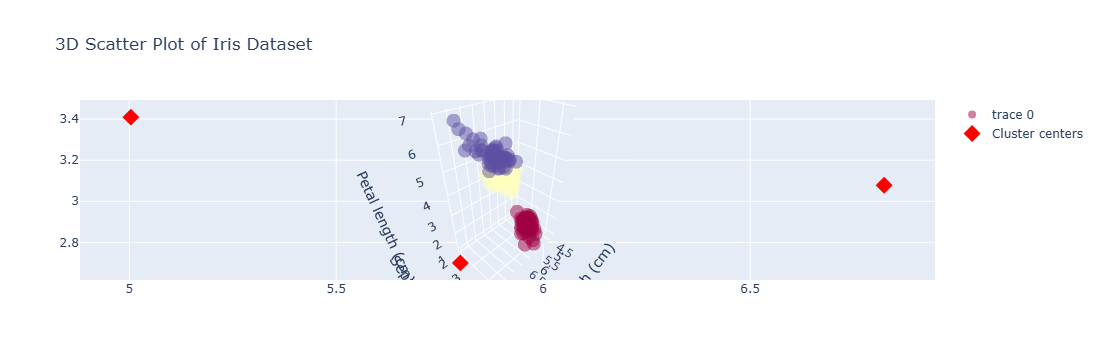

In [26]:
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column (species)
iris_df['iris_target'] = iris.target


# Create a 3D scatter plot
scatter_3d = go.Scatter3d(
    x=iris_df['sepal length (cm)'],
    y=iris_df['sepal width (cm)'],
    z=iris_df['petal length (cm)'],
    mode='markers',
    marker=dict(
        size=8,
        color=iris_df['iris_target'],
        colorscale='Spectral',
        opacity=0.5
    ),
    text=iris.target_names[iris_df['iris_target']],
    hoverinfo='text'
)

# Create a scatter plot for cluster centers (only for the first two components)
cluster_centers = go.Scatter(
    x=model.cluster_centers_[:, 0],
    y=model.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(
        size=13,
        color='red',
        symbol='diamond'
    ),
    name='Cluster centers'
)

# Define layout
layout = go.Layout(
    title='3D Scatter Plot of Iris Dataset',
    scene=dict(
        xaxis=dict(title='Sepal length (cm)'),
        yaxis=dict(title='Sepal width (cm)'),
        zaxis=dict(title='Petal length (cm)')
    )
)

# Create figure
fig = go.Figure(data=[scatter_3d, cluster_centers], layout=layout)

# Show plot
pio.show(fig)


Interestingly, we find that the centroids approximately correspond to the three classes of flowers present in the dataset! The $K$-means algorithm was able to discover these without using any labels.

This example should help illustrate how interesting insights can be found using unsupervised learning from completely unlabeled data.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

In [30]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load the MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
#fmnist_dataset = datasets.FashionMNIST((root='./data', train=True, transform=transform, download=True))

# Split into training and testing datasets
train_size = int(0.8 * len(mnist_dataset))  # 80% for training
test_size = len(mnist_dataset) - train_size  # Remaining 20% for testing
train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])

# Wrap the datasets in DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check sizes of the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# Access a batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Print shape of a single batch
print(f"Shape of images: {images.shape}")  # Shape: (batch_size, 1, 28, 28)
print(f"Shape of labels: {labels.shape}")  # Shape: (batch_size,)


Training dataset size: 48000
Test dataset size: 12000
Shape of images: torch.Size([64, 1, 28, 28])
Shape of labels: torch.Size([64])


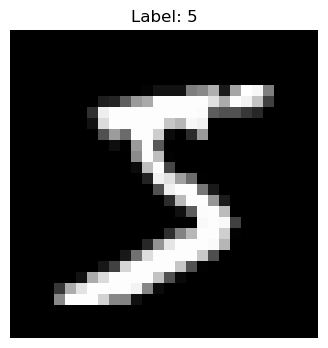

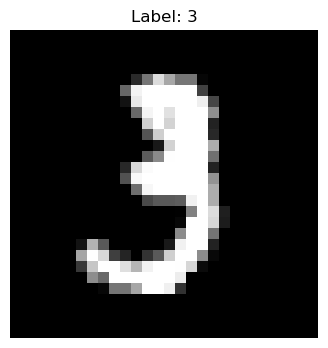

In [32]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load the MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Function to plot a single sample
def plot_single_sample(dataset, index=0):
    img, label = dataset[index]  # Access the image and label at the specified index
    img = img.squeeze().numpy()  # Remove channel dimension and convert to NumPy array
    
    # Plot the image
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Plot the first sample (index=0)
plot_single_sample(mnist_dataset, index=0)

# Plot another sample (e.g., index=10)
plot_single_sample(mnist_dataset, index=10)


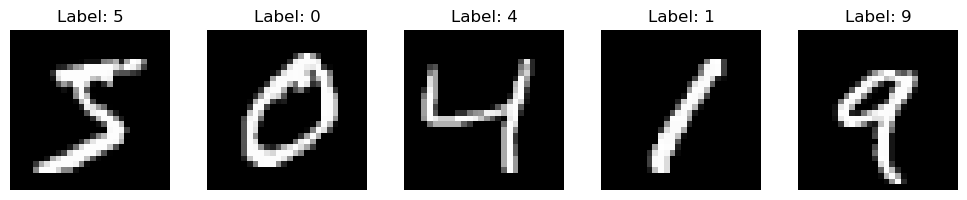

In [10]:
# Function to plot multiple samples
def plot_multiple_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 2))  # Create a figure
    for i in range(num_samples):
        img, label = dataset[i]  # Access image and label at index `i`
        img = img.squeeze().numpy()  # Remove channel dimension and convert to NumPy array
        
        # Plot the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 5 samples
plot_multiple_samples(mnist_dataset, num_samples=5)

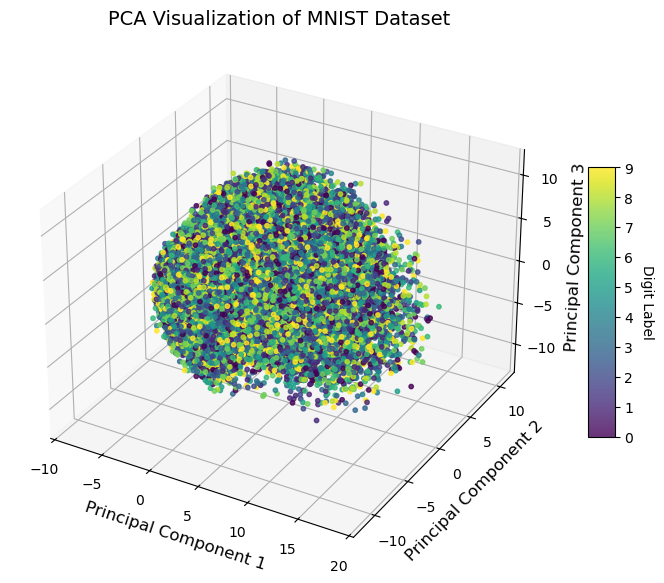

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit
from sklearn.decomposition import PCA
import torch

# Convert training data to numpy for PCA
X_train_numpy = torch.cat([images.view(images.size(0), -1) for images, _ in train_loader]).numpy()
y_train_numpy = torch.cat([labels for _, labels in train_loader]).numpy()

# Initialize PCA
pca = PCA(n_components=3)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train_numpy)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: color by digit labels
scatter = ax.scatter(
    X_train_pca[:, 0],  # Principal Component 1
    X_train_pca[:, 1],  # Principal Component 2
    X_train_pca[:, 2],  # Principal Component 3
    c=y_train_numpy,    # Color by label
    cmap='viridis',     # Colormap
    s=10,               # Marker size
    alpha=0.8           # Opacity
)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Digit Label', rotation=270, labelpad=15)

# Set axis labels
ax.set_title('PCA Visualization of MNIST Dataset', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Show the plot
plt.show()


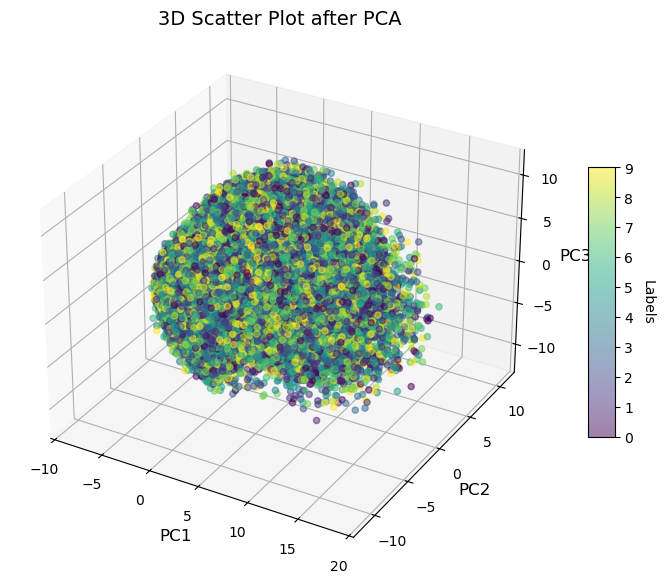

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Check if number of components is greater than or equal to 3
if X_train_pca.shape[1] >= 3:
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter(
        X_train_pca[:, 0],  # PC1
        X_train_pca[:, 1],  # PC2
        X_train_pca[:, 2],  # PC3
        c=y_train_numpy,    # Color by labels
        cmap='viridis',     # Colormap
        s=20,               # Marker size
        alpha=0.5           # Opacity
    )

    # Add color bar to indicate labels
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Labels', rotation=270, labelpad=15)

    # Set axis labels
    ax.set_title('3D Scatter Plot after PCA', fontsize=14)
    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_zlabel('PC3', fontsize=12)

    # Show plot
    plt.show()
else:
    print("Number of components is less than 3. Cannot plot in 3D.")


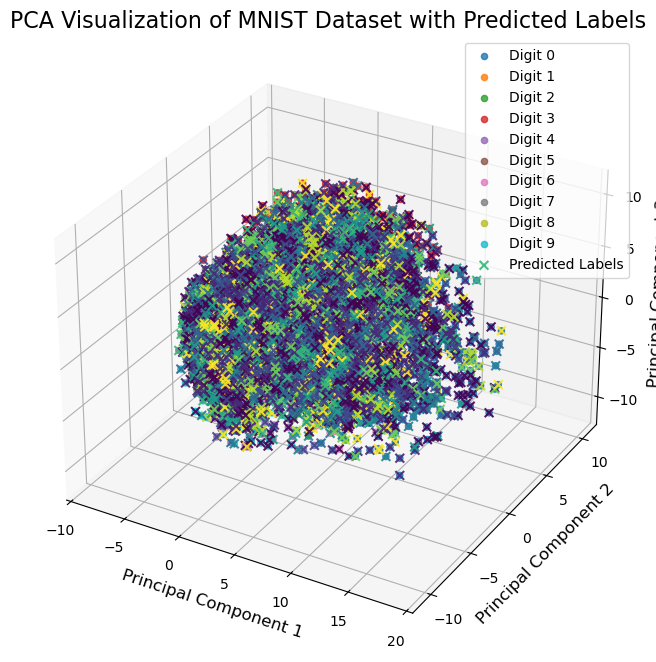

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import torch

# Convert training data to numpy
X_train_numpy = torch.cat([images.view(images.size(0), -1) for images, _ in train_loader]).numpy()
y_train_numpy = torch.cat([labels for _, labels in train_loader]).numpy()

# Convert test data to numpy
X_test_numpy = torch.cat([images.view(images.size(0), -1) for images, _ in test_loader]).numpy()
y_test_numpy = torch.cat([labels for _, labels in test_loader]).numpy()

# Perform PCA on training data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_numpy)

# Train a KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_pca, y_train_numpy)

# Transform the test data using the same PCA
X_test_pca = pca.transform(X_test_numpy)

# Predict labels for the test data
predicted_labels = clf.predict(X_test_pca)

# Create a 3D scatter plot for true labels
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot true labels
for i in range(10):  # Loop through each digit
    mask = y_test_numpy == i  # Filter points for digit `i`
    ax.scatter(
        X_test_pca[mask, 0],  # Principal Component 1
        X_test_pca[mask, 1],  # Principal Component 2
        X_test_pca[mask, 2],  # Principal Component 3
        label=f"Digit {i}",   # Label for the legend
        s=20,                 # Marker size
        alpha=0.8             # Opacity
    )

# Add scatter plot for predicted labels
ax.scatter(
    X_test_pca[:, 0],
    X_test_pca[:, 1],
    X_test_pca[:, 2],
    c=predicted_labels,      # Color by predicted labels
    cmap="viridis",          # Colormap
    s=40,                    # Marker size
    alpha=0.9,               # Opacity
    edgecolor="k",           # Add black edge to markers
    marker="x",              # Marker style for predictions
    label="Predicted Labels"
)

# Set axis labels
ax.set_title("PCA Visualization of MNIST Dataset with Predicted Labels", fontsize=16)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)

# Add legend
ax.legend(loc="upper right", fontsize=10)

# Show the plot
plt.show()


## 8.1.2. Applications of Unsupervised Learning

Unsupervised learning has many additional applications. One example that we introduced in the first lecture is topic modeling. Consider the following text, which contains at least four distinct topics. (image credit: [David Blei](https://www.cs.columbia.edu/~blei/papers/Blei2012.pdf))

<center><img width=60% src="https://kuleshov-group.github.io/aml-resources/img/lda1.png"/></center>

The blue words pertain mostly to computers. The red words pertain to biology. The yellow words are related to genetics.

It would be useful to be able to detect these topics automatically. However, in practice we rarely have access to text in which each word is labeled with a topic.

<center><img width=80% src="https://kuleshov-group.github.io/aml-resources/img/lda3.png"/></center>

Unsupervised topic models automatically discover clusters of related words (these are the "topics", e.g., computers) and assign a topic to each word, as well as a set of topic proportions to each document.

<center><img width=80% src="https://kuleshov-group.github.io/aml-resources/img/lda2.png"/></center>

Other broad classes of use cases for unsupervised learning include:

* __Visualization__: Projecting data into a lower-dimensional space in which it easier to identify and understanding interesting patterns.
* __Anomaly detection__. The field of predictive maintenance seeks to identify factory components that are likely to fail soon.
* __Signal denoising__. Extracting human speech from a noisy audio recording.

<!-- Concrete applications include:

* Discovering Structure in Digits: Unsupervised learning can discover structure in digits without any labels. This task has a similar flavor to the Iris dataset we were looking at earlier.

* DNA Analysis: Unsupervised learning can be used to perform Dimensionality Reduction, which can be applied to DNA to reveal the geography of each country.

* Facial Feature Learning: Modern unsupervised algorithms based on deep learning can uncover structure in human face datasets. -->

# 8.2. The Language of Unsupervised Learning

Next, we will introduce notation and use it to identify the elements that define an unsupervised learning problem.

## 8.2.1. A Recipe for Unsupervised Learning

At a high level, an unsupervised machine learning problem can be described by the following "recipe", which is analogous to supervised learning.

$$ \underbrace{\text{Dataset}}_\text{Attributes, Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Unsupervised Model} $$

To perform supervised learning, we first collect a dataset and define a learning algorithm. The result of running the algorithm on the data is an unsupervised learning model. The outputs of this model are interesting properties of the data.

More formally, we define an __unsupervised dataset__ of size $n$ as

$$
\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}
$$

Each $x^{(i)} \in \mathbb{R}^d$ denotes an input, a vector of $d$ attributes or features.

We can think of an unsupervised learning algorithm as consisting of three components:

* A __model class__: the set of possible unsupervised models we consider.

* An __objective__ function, which defines how good a model is.

* An __optimizer__, which finds the best predictive model in the model class according to the objective function

### 8.2.1.1. Model & Model Class

We'll say that a model is a function

$$ 
f_\theta : \mathcal{X} \to \mathcal{S} 
$$

that maps inputs $x \in \mathcal{X}$ to some kind of structure $s \in \mathcal{S}$. Models may have *parameters* $\theta \in \Theta$ living in a set $\Theta$
Structures can take many forms (clusters, low-dimensional representations, etc.), and we will see many examples.

Formally, the model class is a set 

$$
\mathcal{M} = \{f_\theta \mid f_\theta : \mathcal{X} \to \mathcal{S}; \; \theta \in \Theta \}.
$$

of possible models (models with different parameters) that map input features to structural elements.

### 8.2.1.3. Learning Objective

We again define an *objective function* (also called a *loss function*)

$$
J(\theta) : \Theta \to [0, \infty), 
$$

which describes the extent to which $f_\theta$ "fits" the data $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$.

### 8.2.1.4. Optimizer

An optimizer finds a model $f_\theta \in \mathcal{M}$ with the smallest value of the objective $J$.

$$
\begin{align*}
\min_{\theta \in \Theta} J(\theta)
\end{align*}
$$

Intuitively, this is the function that bests "fits" the data on the training dataset.

## 8.2.2. An Example: $K$-Means

To better understand how these three components define an unsupervised learning algorithm, let's derive the $K$-means algorithm that we have seen earlier in terms of these components.

Recall how we previously introduced the $K$-means algorithm:

* The algorithm seeks to find $K$ hidden clusters in the data.
* Each cluster is characterized by its centroid (its mean).

### 8.2.2.1. K-Means: An Intuitive Explanation

Before we define $K$-means formally, let's define it somewhat more intuitively.

At a high level, $K$-means performs the following steps. 
Starting from random centroids, we repeat until convergence:

1. Update each cluster: assign each point to its closest centroid.
2. Set each centroid to be the center of the its cluster

This is best illustrated visually - see [Wikipedia](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)

<center><img width=50% src="https://kuleshov-group.github.io/aml-resources/img/kmeans_convergence.gif"></center>

In the above example, the big red "+", yellow "-" and blue "$\circ$" symbols represent clusters. At each iteration, they get recomputed to the center of the red, yellow, and blue points respectively. After they are recomputed, the datapoints are re-colored to match the color of their closest centroid.

### 8.2.2.2. The $K$-Means Model

More formally, the parameters $\theta$ of the model are $K$ *centroids* $c_1, c_2, \ldots c_K \in \mathcal{X}$. The class of $x$ is going to be $k$ if $c_k$ is the closest centroid to $x$ (for this lecture, let's assume the distance metric in use is Euclidean distance, although the algorithm works with any distance metric).

We can think of the model returned by $K$-Means as a function

$$
f_\theta(x) = \arg\min_k || x - c_k ||
$$

that assigns each input $x$ to a cluster $s \in \mathcal{S} = \{1,2,\ldots,K\}$.

### 8.2.2.3. The $K$-Means Objective

How do we determine whether $f_\theta$ is a good clustering of the dataset $\mathcal{D}$?

We seek centroids $c_k$ such that the distance between the points and their closest centroid is minimized:

$$
J(\theta) = \sum_{i=1}^n || x^{(i)} - \text{centroid}(f_\theta(x^{(i)})) ||,
$$

where $\text{centroid}(k) = c_k$ denotes the centroid for cluster $k$.

### 8.2.2.4. The $K$-Means Optimizer

We can optimize this in a two-step process, starting with an initial random cluster assignment $f_\theta(x)$.

Starting with random centroids $c_k$, repeat until convergence:

1. Update $f(x)$ such that $f(x^{(i)}) = \arg\min_k ||x^{(i)} - c_k||$ is the cluster of the closest centroid to $x^{(i)}$.

2. Set each $c_k$ to be the center of its cluster $\{x^{(i)} \mid f(x^{(i)}) = k\}$.

Though we do not prove it here, this process is guaranteed to converge after a finite number of iterations. The intuition is that the objective function decreases at each step, hence at some point it must reach an optimum

### 8.2.2.5. Algorithm: K-Means

This completes our definition of $K$-means in terms of its model, objective, and optimizer. This definition is now sufficiently precise for you to implement this algorithm from scratch. In fact, in the next lecture, we will implement an improved version of this algorithm.

As with previous supervised algorithms, we provide a model card for $K$-means in terms of its standard components:

* __Type__: Unsupervised learning (clustering)

* __Model family__: $k$ centroids

* __Objective function__: Sum of distances (of your choice) to the closest centroids

* __Optimizer__: Iterative optimization procedure.

# 8.3. Unsupervised Learning in Practice

We conclude this lecture with some practical considerations to keep in mind when applying unsupervised learning.

Recall that in supervised learning, __generalization__ is the property of predictive models to achieve good performance on new, holdout data that is distinct from the training set.

How does generalization apply to unsupervised learning?

## 8.3.0. An Unsupervised Learning Dataset

As a running example for this subsection, consider the following dataset, consisting of datapoints generated by a mixture of four Gaussian distributions. A sample from this mixture distribution should form roughly four clusters.

We visualize a sample of 100 datapoints below:

In [ ]:
# import libraries
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Setting the seed makes the random module of numpy deterministic across different runs of the program
np.random.seed(0)
# Generate random 2D datapoints using 4 different Gaussians.
X, y = datasets.make_blobs(centers=4)
plt.scatter(X[:,0], X[:,1])

We know the true labels of these clusters, i.e., which Gaussian a datapoint is generated by, so we can visualize them with different colors below:

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

## 8.3.1. Underfitting in Unsupervised Learning

In supervised learning, underfitting occurs when our model is too simple to fit the data.

Similarly, in unsupervised learning, underfitting happens when we are not able to fully learn the signal present in the data. In the context of $K$-Means, this means our $K$ is lower than the actual number of clusters in the data.

Let's run $K$-Means on our toy dataset.

In [ ]:
# fit a K-Means
from sklearn import cluster
model = cluster.KMeans(n_clusters=2)
model.fit(X)

The centroids find two distinct components (or clusters) in the data, but they fail to capture the true structure.

Below, we visualize both the datapoints and the learned clusters. You can see that more than one true cluster (represented by different colors) is associated to a learned cluster.

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print('K-Means Objective: %.2f' % -model.score(X))

## 8.3.4. Overfitting in Unsupervised Learning

Overfitting happens when we fit the noise, but not the signal. In our example, this means fitting small, local noise clusters rather than the true global clusters. 

Consider what happens if we further increase $K$ in our earlier example.
In the figures below, we set $K$ equal to 4, 10, and 20 from left to right respectively. 

In [ ]:
# Will visualize learned clusters of K-means with different Ks.
Ks = [4, 10, 20]
f, axes = plt.subplots(1,3)
for k, ax in zip(Ks, axes):
    # Fit K-means
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    # Visual both the datapoints and the k learned clusters 
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title('K-Means Objective: %.2f' % -model.score(X))

We can take this one step further by setting $K = 50$ below.

In [ ]:
# Setting K = 50
model = cluster.KMeans(n_clusters=50)
# Fit K-means
model.fit(X)
# Visualize both the datapoints and the learned clusters
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print('K-Means Objective: %.2f' % -model.score(X))

## 8.3.5. Generalization in Unsupervised Learning

To talk about generalization, we usually assume that the dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as

$$
x \sim \mathbb{P}.
$$

Moreover, we assume the dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ consists of *independent and identically distributed* (IID) samples from $\mathbb{P}$.

What *independent and identically distributed* (IID) means is: 

* Each training example is from the same distribution.

* This distribution doesn't depend on previous training examples.

__Example__: Flipping a coin. Each flip has the same probability of heads & tails and doesn't depend on previous flips.

__Counter-Example__: Yearly census data. The population in each year will be close to that of the previous year.

We can think of the data distribution as being the sum of two distinct components $\mathbb{P} = F + E$

1. A signal component $F$ (hidden clusters, speech, low-dimensional data space, etc.)

2. A random noise component $E$

A machine learning model generalizes if it fits the true signal $F$; it overfits if it learns the noise $E$. This definition is less precise than the one we introduced initially in the context of supervised learning; however, it is also more general and applies to unsupervised learning algorithms.

Below, we visualize examples of underfitting, a good fit, and overfitting in the context of our running example with $K$-means.

In [ ]:
Ks, titles = [2, 4, 20], ['Underfitting', 'Good fit', 'Overfitting']
f, axes = plt.subplots(1,3)
for k, title, ax in zip(Ks, titles, axes):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title(title)

### 8.3.5.1. Detecting Overfitting and Underfitting

In real-life scenarios when our data is not two-dimensional, visualizing the data and the cluster centers might not help us detect overfitting or underfitting. We would also not have access to the true cluster labels.

Generally, in unsupervised learning, overfitting and underfitting are more difficult to quantify than in supervised learning because:

* Performance may depend on our intuition and require human evaluation

* If we know the true labels, we can measure the accuracy of the clustering. But we do not have labels for unsupervised learning.

If our model is probabilistic, one thing that we can do to detect overfitting without labels is to compare the log-likelihood between the training set and a holdout set (see the next lecture).

### 8.3.5.2. The Elbow Method

The elbow method is a useful heuristic that can be used to tune hyper-parameters in unsupervised learning, e.g., choosing $K$ for $K$-means.
The elbow method works as follows:

* We plot the objective function as a function of the hyper-parameter $K$.

* The "elbow" of the curve happens when its rate of decrease substantially slows down.

* The "elbow' is a good guess for the hyperparameter.

In our example, the decrease in objective values slows down after $K=4$, and after that, the curve becomes just a line.
Below we plot the graph of objective function value vs $K$. You can see that at $K = 4$, our objective value does not improve too much anymore even if we increase $K$.

In [ ]:
Ks, objs = range(1,11), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    objs.append(-model.score(X))

plt.plot(Ks, objs, '.-', markersize=15)
plt.scatter([4], [objs[3]], s=200, c='r')
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")

### 8.3.5.3. Reducing Overfitting

Choosing hyper-parameters via the elbow method is one thing you can do to avoid overfitting. 
In general, there are multiple ways to control overfitting including:

1. Reduce model complexity (e.g., reduce $K$ in $K$-Means)

2. Penalize complexity in the objective (e.g., penalize large $K$)

3. Use a probabilistic model and regularize it.

### 8.3.5.4. Generalization in Unsupervised Learning: Summary

As you can see, the concept of generalization applies to both supervised and unsupervised learning.

* In supervised learning, it is easier to quantify via accuracy.

* In unsupervised learning, we may not be able to easily detect overfitting, but it still happens. We have discussed practical methods to diagnose and reduce overfitting.